# Introduction to Data Science 2021

# Week 6: Recap

## Exercise 1 | Linear regression with feature selection

Download the [TED Talks](https://www.kaggle.com/rounakbanik/ted-talks) dataset from Kaggle. Your task is to predict both the ratings and the number of views of a given TED talk. You should focus only on the <span style="background-color: #ccfff2">ted_main</span> table.

1. Download the data, extract the following ratings from column <span style="background-color: #ccfff2">ratings</span>: <span style="background-color: #ccfff2">Funny</span>, <span style="background-color: #ccfff2">Confusing</span>, <span style="background-color: #ccfff2">Inspiring</span>. Store these values into respective columns so that they are easier to access. Next, extract the tags from column <span style="background-color: #ccfff2">tags</span>. Count the number of occurrences of each tag and select the top-100 most common tags. Create a binary variable for each of these and include them in your data table, so that you can directly see whether a given tag (among the top-100 tags) is used in a given TED talk or not.

In [2]:
import pandas as pd
import numpy as np
import json
import ast

ted_main = pd.read_csv('./ted_main.csv', sep=',')
ted_main['ratings'] = ted_main.ratings.apply(lambda x: ast.literal_eval(x))
ted_main['Funny'] = ted_main.ratings.apply(lambda x: list(y['count'] for y in x if y['name']=='Funny')[0])
ted_main['Confusing'] = ted_main.ratings.apply(lambda x: list(y['count'] for y in x if y['name']=='Confusing')[0])
ted_main['Inspiring'] = ted_main.ratings.apply(lambda x: list(y['count'] for y in x if y['name']=='Inspiring')[0])

tags = ted_main.tags.apply(lambda x: ast.literal_eval(x))
tags = tags.apply(pd.Series).stack().reset_index(drop=True)
tags = pd.DataFrame(tags)
tags = tags.rename(columns={0: 'Tag'})
tags['count'] = tags.groupby('Tag')['Tag'].transform('count')
tags = tags.sort_values('count', ascending=False).drop_duplicates().head(100)['Tag']

for t in tags:
    ted_main[t] = ted_main.tags.apply(lambda x: (0 if t not in ast.literal_eval(x) else 1))

ted_main

/tmp/ipykernel_129374/4202321289.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ted_main[t] = ted_main.tags.apply(lambda x: (0 if t not in ast.literal_eval(x) else 1))


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,food,religion,family,ecology,peace,poetry,demo,illness,universe,energy
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,0,0,0,0,0,0,0,0,0,0
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,0,0,0,0,0,0,0,0,0,0
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,0,0,0,0,0,0,0,0,0,0
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,0,0,0,0,0,0,0,0,0,0
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,...,0,0,1,0,0,0,0,0,0,0
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,...,0,0,0,0,0,0,0,0,1,0
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,...,0,0,0,0,0,0,0,0,0,0
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,...,0,0,0,0,0,0,0,0,0,0


2. Construct a linear regression model to predict the number of views based on the data in the <span style="background-color: #ccfff2">ted_main</span> table, including the binary variables for the top-100 tags that you just created. You can ignore the speaker name and other non-structured data.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

pred_cols = tags.append(pd.Series('comments')).append(pd.Series('duration')).append(pd.Series('num_speaker'))

X = np.array(ted_main[pred_cols].values.tolist())
y = np.array(ted_main['views'])

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True, random_state=12)

reg = LinearRegression().fit(X_train,y_train)

reg.score(X_test, y_test)

0.5093293920341078

3. Do the same for the <span style="background-color: #ccfff2">Funny</span>, <span style="background-color: #ccfff2">Confusing</span>, and <span style="background-color: #ccfff2">Inspiring</span> ratings.

In [19]:
pred_cols1 = ['Funny', 'Confusing', 'Inspiring']
X1 = np.array(ted_main[pred_cols1].values.tolist())
X1_train, X1_test, y1_train, y1_test = tts(X1, y, test_size=0.2, shuffle=True, random_state=12)

reg_tags = LinearRegression().fit(X1_train,y1_train)

reg_tags.score(X1_test, y1_test)

0.7487263670624724

4. You will probably notice that most of the tags are not useful in predicting the views and the ratings. You should use some kind of variable selection to prune the set of tags that are included in the model. You can use for example classical p-values or more modern [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)) techniques. Which tags are the best predictors of each of the response variables?

In [41]:
from sklearn.linear_model import LassoCV

lasso_reg = LassoCV(eps=1e-3, normalize=True).fit(X_train, y_train)

lasso_reg.score(X_test, y_test)


0.519049671654138

5. Produce summaries of your results. Could you recommend good tags – or tags to avoid! – for speakers targeting plenty of views and/or certain ratings?

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Symbol classification (part 2)

Note that it is strongly recommended to use Python in this exercise. However, if you can find a suitable AutoML implementation for your favorite language (e.g [here](http://h2o-release.s3.amazonaws.com/h2o/master/3888/docs-website/h2o-docs/automl.html) seems to be one for R) then you are free to use that language as well.

Use the preprocessed data from week 3 (you can also produce them using the example solutions of week 3).

1. This time train a *random forest classifier* on the data. A random forest is a collection of *decision trees*, which makes it an *ensemble* of classifiers. Each tree uses a random subset of the features to make it’s prediction. Without tuning any parameters, how is the accuracy?

In [11]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier

# OLD CODE TO LOAD DATA
labels = pd.read_csv('./hasyv2/hasy-data-labels.csv', sep=',')
labels = labels[labels['symbol_id'] >= 70]
labels = labels[labels['symbol_id'] <= 80]
paths = labels['path']
labels = labels['latex']
images = np.array([np.array(cv2.cvtColor(cv2.imread('hasyv2/'+file),cv2.COLOR_BGR2GRAY)).reshape(-1) for file in paths])
X_train, X_test, y_train, y_test = tts(images, labels, test_size=0.2, shuffle=True, random_state=12)

# ACTUAL CODE
clf = RandomForestClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

0.8333333333333334

2. The amount of trees to use as a part of the random forest is an example of a hyperparameter, because it is a parameter that is set prior to the learning process. In contrast, a parameter is a value in the model that is learned from the data. Train 20 classifiers, with varying amounts of decision trees starting from 10 up until 200, and plot the test accuracy as a function of the amount of classifiers. Does the accuracy keep increasing? Is more better?

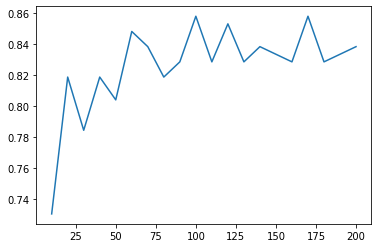

In [12]:
from matplotlib import pyplot as plt

cl = []
for i in range(1,21):
    cl.append(RandomForestClassifier(n_estimators=i*10).fit(X_train, y_train))

Xgr = []
Ygr = []

for i in range(1,21):
    Xgr.append(i*10)
    Ygr.append(cl[i-1].score(X_test, y_test))

plt.plot(Xgr, Ygr)
plt.show()

3. If we had picked the amount of decision trees by taking the value with the best test accuracy from the last plot, we would have *overfit* our hyperparameters to the test data. Can you see why it is a mistake to tune hyperparameters of your model by using the test data?

I think that tuning the model to fit more the test data is wrong in principle, because the test data partition is pretty smaller than the training one. We then would have a high accuracy score, since it's supposed to be exactly like this, but the model is overfitted on THAT test data; if, for instance, we reshuffle test and training data, then the model would perform totally worse.

4. Reshuffle and resplit the data so that it is divided in 3 parts: training (80%), validation (10%) and test (10%). Repeatedly train a model of your choosing (e.g random forest) on the training data, and evaluate it’s performance on the validation set, while tuning the hyperparameters so that the accuracy on the validation set increases. Then, finally evaluate the performance of your model on the test data. What can you say in terms of the generalization of your model?

In [64]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels, random_state=15)

X, X_test, y, y_test = tts(images, labels, train_size=0.8, shuffle=True, random_state=12)
X_train, X_validate, y_train, y_validate = tts(X, y, test_size=0.25)

clf = RandomForestClassifier(n_estimators=100, min_samples_split=2, max_features=0.25).fit(X_train, y_train)

display(clf.score(X_validate, y_validate), clf.score(X_test, y_test))

0.8186274509803921

0.7745098039215687

5. This process of picking a suitable model, evaluating its performance and tuning the hyperparameters is very time consuming. A new idea in machine learning is the concept of automating this by using an optimization algorithm to find the best model in the space of models and their hyperparameters. Have a look at [TPOT](https://github.com/EpistasisLab/tpot), an automated ML solution that finds a good model and a good set of hyperparameters automatically. Try it on this data, it should outperform simple models like the ones we tried easily. Note that running the algorithm might take a while, depending on the strength of your computer. 

*Note*: In case it is running for too long, try checking if the parameters you are using when calling TPOT are reasonable, i.e. try reducing number of ‘generations’ or ‘population_size’. TPOT uses cross-validation internally, so we don’t need our own validation set.

In [66]:
from tpot import TPOTClassifier

print('a')

ImportError: cannot import name 'available_if' from 'sklearn.utils.metaestimators' (/home/enrico/.local/lib/python3.9/site-packages/sklearn/utils/metaestimators.py)

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**